# Ciencia de Datos en Python
## Proyecto #1
### Regresión Lineal Uni-Variable

In [2]:
# importo las librerías necesarias para realizar el proyecto

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [4]:
# Cargo los datos del csv usando numpy
datos = np.load('C:/Users/risca/Desktop/Maestria Ciencia de Datos/Ciencia de datos en Python/Ciencia_de_Datos_Python/U/Proyecto1/proyecto_training_data.npy')

In [8]:
df_datos = pd.DataFrame(datos)
df_datos.head()

,0,1,2,3,4,5
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


In [9]:
df_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1460 non-null   float64
 1   1       1460 non-null   float64
 2   2       1460 non-null   float64
 3   3       1460 non-null   float64
 4   4       1460 non-null   float64
 5   5       1201 non-null   float64
dtypes: float64(6)
memory usage: 68.6 KB


In [10]:
# Le agrego los nombres a las columnas
nombre_columnas = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']
df_datos.columns = nombre_columnas

In [11]:
df_datos

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [13]:
!git init

Initialized empty Git repository in C:/Users/risca/Desktop/Maestria Ciencia de Datos/Ciencia de datos en Python/Ciencia_de_Datos_Python/U/Proyecto1/.git/


In [14]:
!git add Proyecto1_RegresionLineal.ipynb

The file will have its original line endings in your working directory


In [15]:
!git status

On branch master

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)
	new file:   Proyecto1_RegresionLineal.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	Data fields.txt
	proyecto_training_data.npy



In [16]:
!git commit -m "Primer commit del proyecto1 de regresion lineal uni-variable"

[master (root-commit) 97a9e48] Primer commit del proyecto1 de regresion lineal uni-variable
 1 file changed, 400 insertions(+)
 create mode 100644 Proyecto1_RegresionLineal.ipynb


In [18]:
!git branch -M main

In [20]:
!git remote add origin https://github.com/CarlosRisch/ProyectoRegresion.git

In [21]:
!git status

On branch main
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Proyecto1_RegresionLineal.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	Data fields.txt
	proyecto_training_data.npy

no changes added to commit (use "git add" and/or "git commit -a")


In [22]:
!git push -u origin main

Branch 'main' set up to track remote branch 'main' from 'origin'.


To https://github.com/CarlosRisch/ProyectoRegresion.git
 * [new branch]      main -> main


## 2 Definimos los sets de Entrenamiento (80%), de Pruebas y validación(20%) como DataFrames usando Slicing

In [14]:
# Set para entrenamiento 80%
set_entrenamiento = pd.DataFrame(datos[:int(len(datos) * 0.8)], columns = nombre_columnas)

# Set para Pruebas y Validación 20%
set_pruebas = pd.DataFrame(datos[int(len(datos) * 0.8):], columns = nombre_columnas)


In [15]:
print(set_entrenamiento)

      SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0      208500.0          7.0     856.0           8.0     2003.0         65.0
1      181500.0          6.0    1262.0           6.0     1976.0         80.0
2      223500.0          7.0     920.0           6.0     2001.0         68.0
3      140000.0          7.0     961.0           7.0     1915.0         60.0
4      250000.0          8.0    1145.0           9.0     2000.0         84.0
...         ...          ...       ...           ...        ...          ...
1163   108959.0          4.0    1258.0           6.0     1969.0         60.0
1164   194000.0          5.0    1432.0           5.0     1978.0          NaN
1165   233170.0          7.0    1502.0           7.0     2009.0         79.0
1166   245350.0          8.0    1694.0           7.0     2008.0         64.0
1167   173000.0          6.0     959.0           7.0     2000.0         58.0

[1168 rows x 6 columns]


In [16]:
print(set_pruebas)

     SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0     235000.0          6.0    1236.0           7.0     1935.0        120.0
1     625000.0         10.0    1831.0          10.0     1995.0        118.0
2     171000.0          6.0    1118.0           6.0     1977.0         76.0
3     163000.0          6.0    1261.0           6.0     1958.0         76.0
4     171900.0          7.0     625.0           5.0     2006.0         35.0
..         ...          ...       ...           ...        ...          ...
287   175000.0          6.0     953.0           7.0     1999.0         62.0
288   210000.0          6.0    2073.0           7.0     1978.0         85.0
289   266500.0          7.0    1188.0           9.0     1941.0         66.0
290   142125.0          5.0    1078.0           5.0     1950.0         68.0
291   147500.0          5.0    1256.0           6.0     1965.0         75.0

[292 rows x 6 columns]


## 3. Análisis exploratorio de datos: Para cada variable en el dataset calcular((usando numpy o pandas):
#### media
#### valor máximo
#### valor mínimo
#### rango(peak to peak, no el rango del tensor que por ser vector sabemos que es 1)
#### desviación estándar.


In [17]:
# obtenemos la media, valor maximo, valor minimo, rango peak to peak y la desviación estandar del set de entrenamiento
# utilizamos las funciones nan para los diferentes cálculos, de tal manera que ignoramos los valores NAN, y así no afecta en los cálculos
# el rango peak to peak lo obtemos restando el valor minimo del valor maximo

media = np.nanmean(set_entrenamiento, axis=0)
valor_maximo = np.nanmax(set_entrenamiento, axis=0)
valor_minimo = np.nanmin(set_entrenamiento, axis=0)
rango_peak_to_peak = valor_maximo - valor_minimo
desviacion_estandar = np.nanstd(set_entrenamiento, axis=0)

print(f'La media para cada variable del dataset de entrenamiento es: {media}')
print(f'El Valor máximo para cada variable del dataset de entrenamiento es: {valor_maximo}')
print(f'El Valor mínimo cada variable del dataset de entrenamiento es: {valor_minimo}')
print(f'El rango peak to peak para cada variable del dataset de entrenamiento es: {rango_peak_to_peak}')
print(f'La desviación estándar para cada variable del dataset de entrenamiento es: {desviacion_estandar}')

La media para cada variable del dataset de entrenamiento es: [1.80590277e+05 6.10102740e+00 1.15632363e+03 6.48544521e+00
 1.97145120e+03 6.99469854e+01]
El Valor máximo para cada variable del dataset de entrenamiento es: [7.550e+05 1.000e+01 3.228e+03 1.400e+01 2.010e+03 3.130e+02]
El Valor mínimo cada variable del dataset de entrenamiento es: [3.490e+04 1.000e+00 3.340e+02 2.000e+00 1.875e+03 2.100e+01]
El rango peak to peak para cada variable del dataset de entrenamiento es: [7.201e+05 9.000e+00 2.894e+03 1.200e+01 1.350e+02 2.920e+02]
La desviación estándar para cada variable del dataset de entrenamiento es: [7.87819511e+04 1.37743519e+00 3.73620332e+02 1.60845172e+00
 2.99388821e+01 2.34659548e+01]


## 4. Para cada variable en el dataset usar seaborn(funcion distplot https://seaborn.pydata.org/generated/seaborn.distplot.html) para graficar un histograma de la variable

C:\Users\risca\AppData\Local\Temp\ipykernel_116592\1749370956.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(set_entrenamiento.iloc[:,i], kde=False, bins=15, ax=axes[i//2, i%2])


<function matplotlib.pyplot.show(close=None, block=None)>

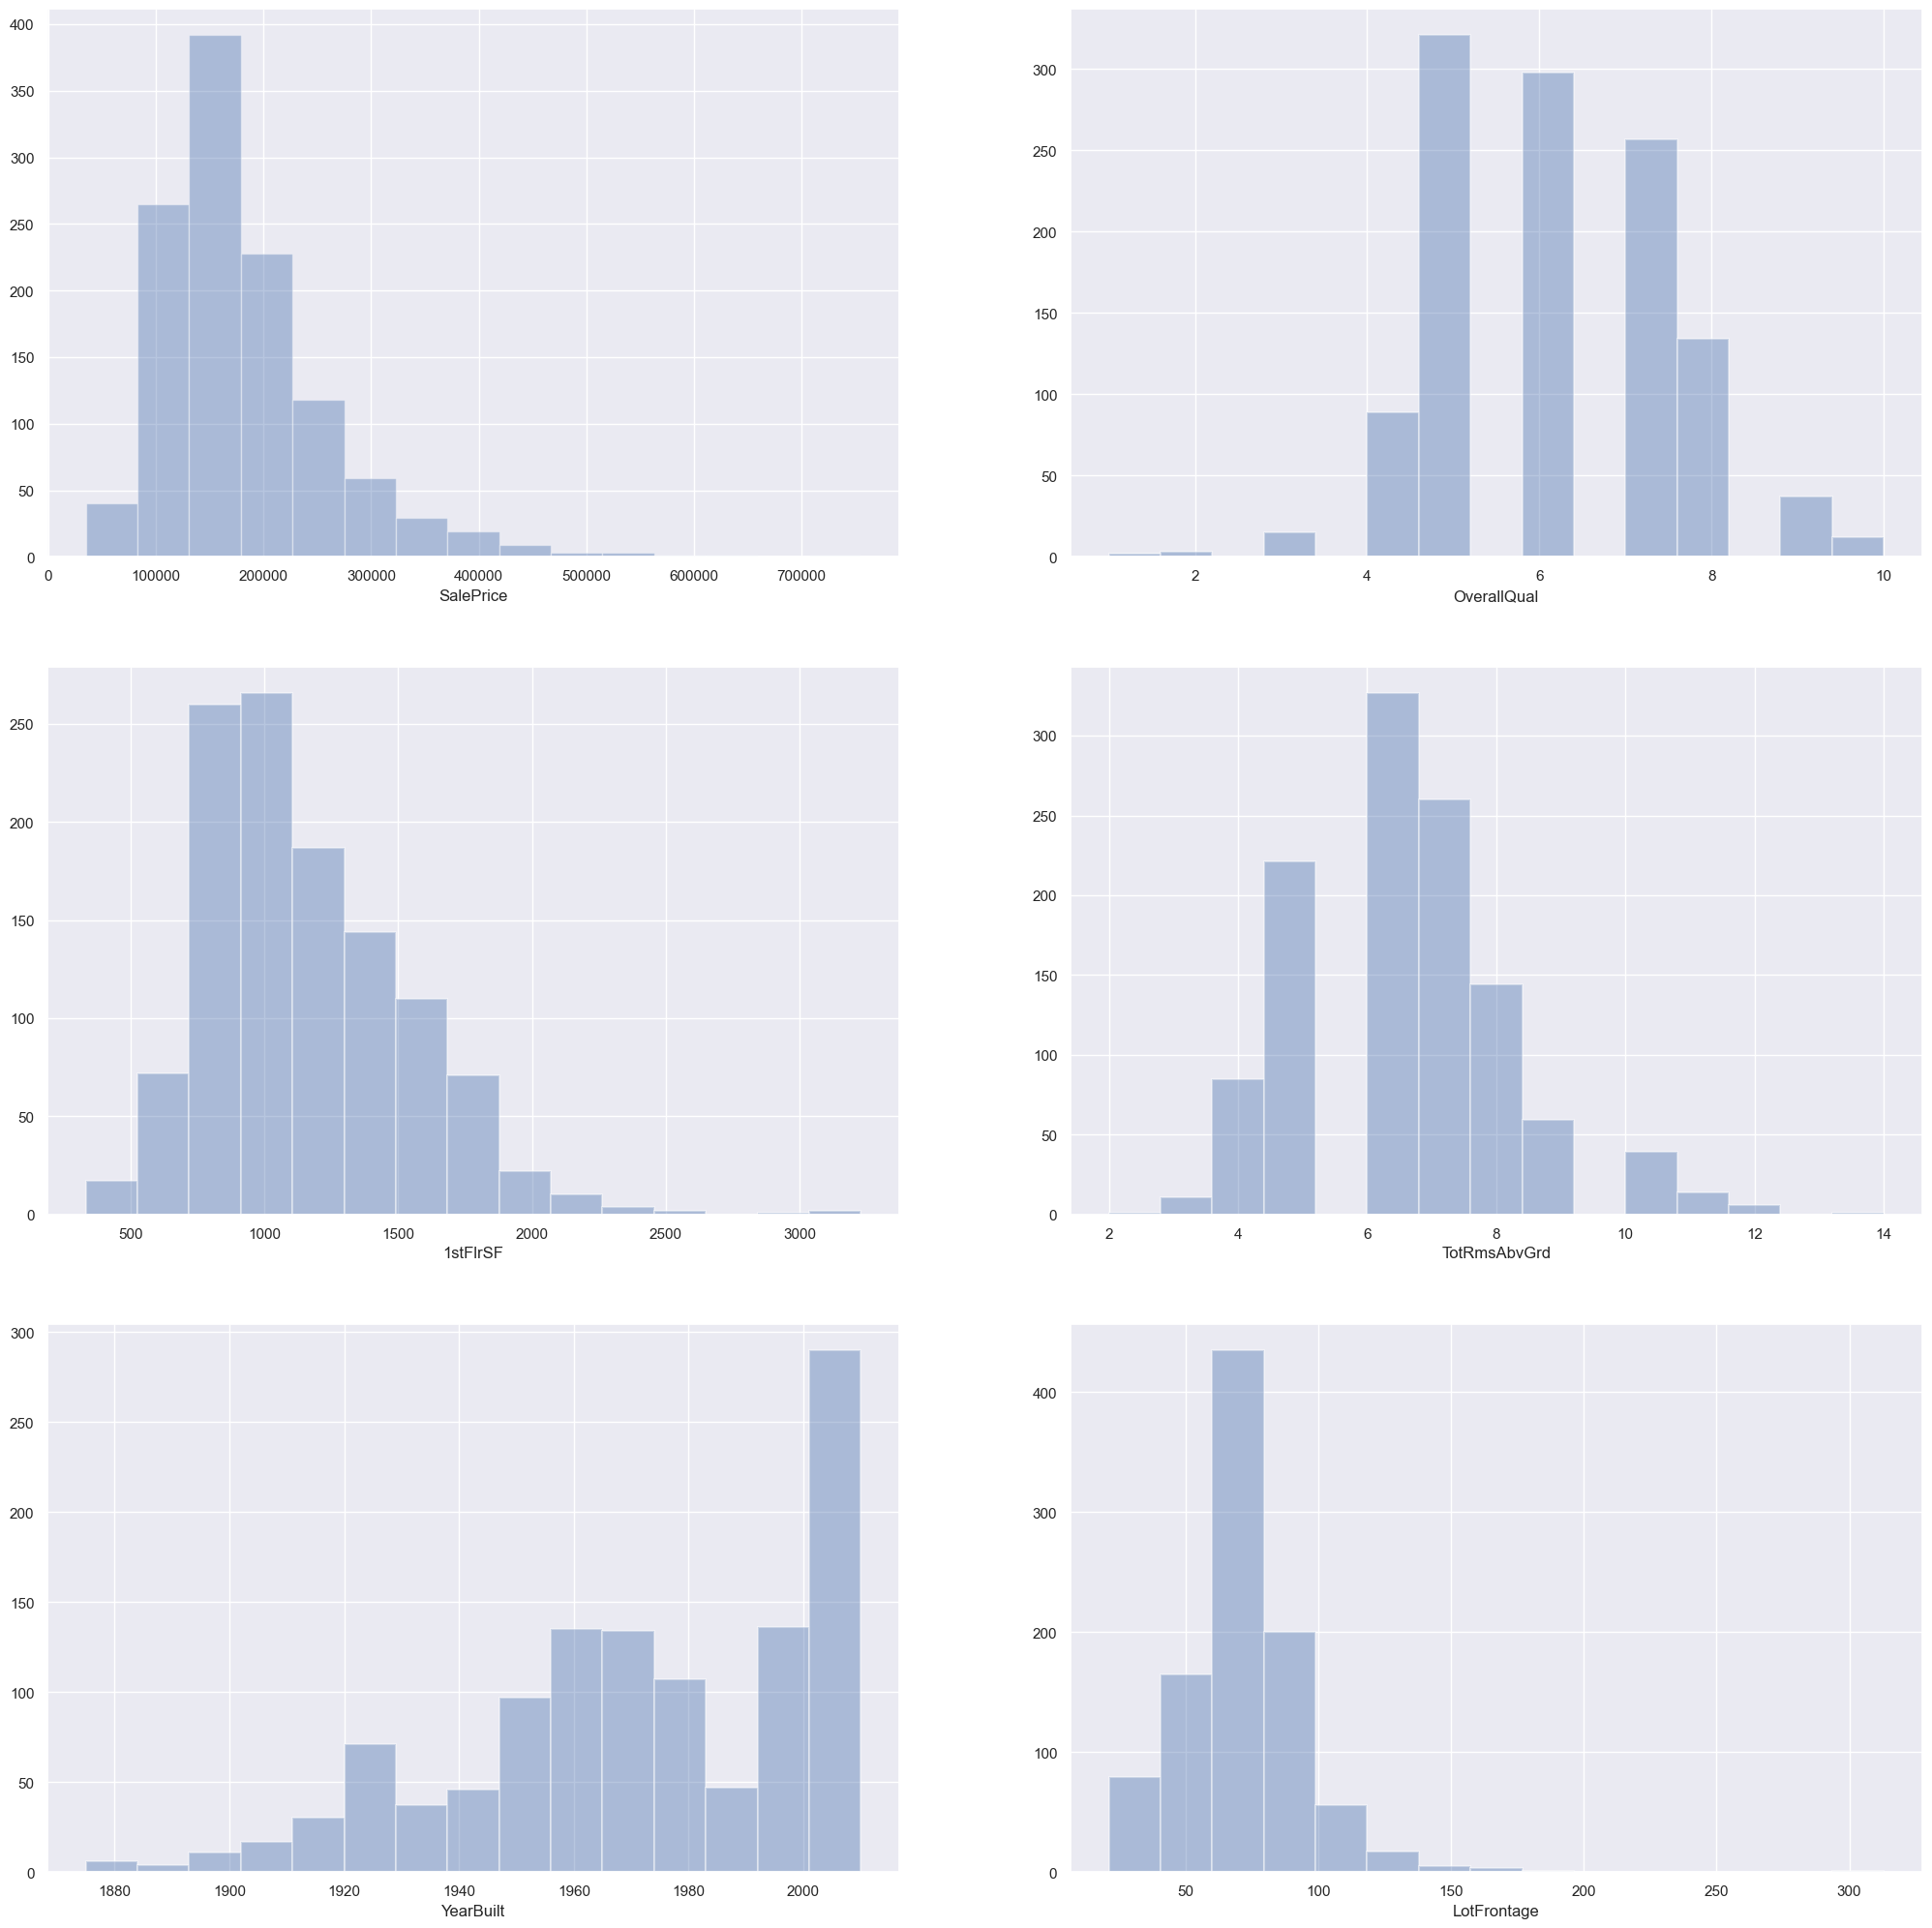

In [20]:
# Utilizamos Seaborn para realizar el histograma por cada variable del set de entrenamiento
fig, axes = plt.subplots(figsize=(25,25), nrows=3, ncols=2)
sns.set_theme()

for i in range(set_entrenamiento.shape[1]):
    sns.distplot(set_entrenamiento.iloc[:,i], kde=False, bins=15, ax=axes[i//2, i%2])
    sns.set_context('talk')
plt.show

In [ ]:
!